In [68]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import *
import glob
import os
import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [156]:
def augment_hurricane(folder):
    profile_name = folder + '/profile.json'
    f = open(profile_name)
    profile = json.load(f)
    
    results = []
    curr_day = None
    for it in profile['path']:
        
        day = str(it['date'])
        if curr_day == day:
            continue
        curr_day = day
        rgb_names = folder + '/10_wavelet_rgb_' + day + '*.npy'
   
        rgbs = glob.glob(rgb_names, recursive = True)
    
        if len(rgbs) == 0:
            print ('skipping', folder, it)
            continue
        res = score(rgbs[0])
        res['maxwind'] = it['maxwind']
        res['folder'] = folder
        
        results.append(res)
        
    return results

def get_circluar_mask(arrlen, cx, cy, r1, r2):
    x = np.arange(0, arrlen)
    y = np.arange(0, arrlen)
    arr = np.zeros((y.size, x.size))
    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r1**2
    mask2 = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r2**2
    arr[mask2] = 1
    arr[mask] = 0
     
    return arr

def get_circlar_avg(inner, outer, arr):
    
    masks = get_circluar_mask(len(arr[0]), len(arr[0])/2,len(arr[0])/2, inner, outer)
    
    mask_arr = masks.flatten()
    val = arr.flatten()
    
    subset = []
    for i in range(0, len(val)):
        if mask_arr[i] == 1:
            subset.append(val[i])
    
    return np.average(subset)

        
def score(rgb_file):
    
    rgb = np.load(rgb_file)
    rgb = ((rgb * 10000 + 100) / 66.66)*1.5
    rgb = rgb.astype(int)
    rgb[rgb < 0] = 0
    rgb[rgb > 255] = 255
    red = rgb[:, :, 0]
    green = rgb[:, :, 1]
    blue = rgb[:, :, 2]
    
    R_LH = rgb[1, :, :]
    R_HL = rgb[2, :, :]
    R_HH = rgb[3, :, :]
    
    G_LH = rgb[5, :, :]
    G_HL = rgb[6, :, :]
    G_HH = rgb[7, :, :]
    
    B_LH = rgb[9, :, :]
    B_HL = rgb[10, :, :]
    B_HH = rgb[11, :, :]
        
    
    res = {}
    
    
#     res['var_10'] = get_square_var(90, 110, R_LH)  + get_square_var(90, 110, R_HL)  + get_square_var(90, 110, R_HH)  
#     res['var_25'] = get_square_var(75, 125, G_LH) + get_square_var(75, 125, G_HL)  + get_square_var(75, 125, G_HH)  
#     res['var_50'] = get_square_var(50, 150, B_LH) + get_square_var(50, 150, B_HL)  + get_square_var(50, 150, B_HH)  
    
    res['avg_10'] = get_circlar_avg(0, 10, R_LH)
    res['avg_20'] = get_circlar_avg(10, 20, R_LH) - res['avg_10']
    res['avg_30'] = get_circlar_avg(20, 30, R_LH) - res['avg_20']
    res['avg_40'] = get_circlar_avg(30, 40, R_LH) - res['avg_30']
    res['avg_50'] = get_circlar_avg(40, 50, R_LH) - res['avg_40']
    res['avg_60'] = get_circlar_avg(50, 60, R_LH) - res['avg_50']
    
    
    
    return res
    
def get_square_var(start, end, arr):
    return np.var(arr[start:end, start:end].flatten())

def get_square_avg(start, end, arr):
    return np.average(arr[start:end, start:end].flatten())
   
    
    

In [167]:
folders = glob.glob('/home/fun/data/AL*2001/', recursive = True)

results = []
for it in folders:
    print (it)
    results += augment_hurricane(it)

df = pd.DataFrame(results)


    

/home/fun/data/AL012001/
/home/fun/data/AL022001/
/home/fun/data/AL032001/
/home/fun/data/AL042001/
/home/fun/data/AL052001/
/home/fun/data/AL062001/
/home/fun/data/AL072001/
/home/fun/data/AL082001/
/home/fun/data/AL092001/
/home/fun/data/AL102001/
/home/fun/data/AL112001/
/home/fun/data/AL122001/
/home/fun/data/AL132001/
/home/fun/data/AL142001/
/home/fun/data/AL152001/
/home/fun/data/AL162001/
/home/fun/data/AL172001/


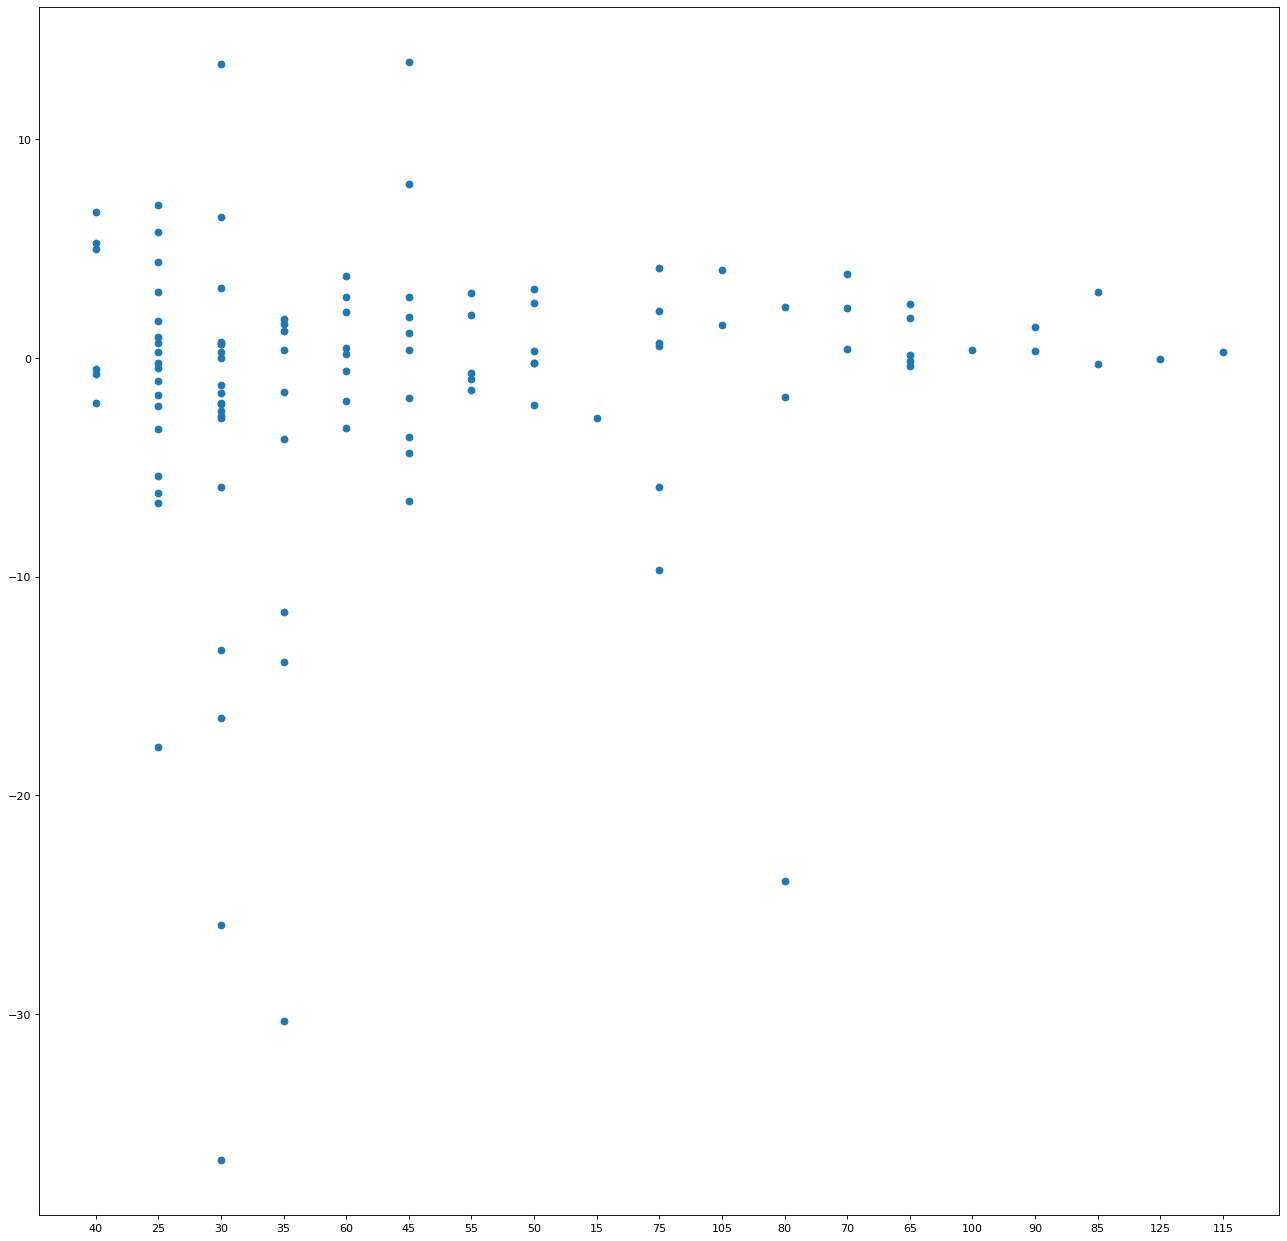

In [169]:
df.columns
plt.figure(figsize=(20, 20), dpi=80)
#plt.scatter(df['maxwind'], df['var_10'])
plt.scatter(df['maxwind'], df['avg_20'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400, 400, 3)


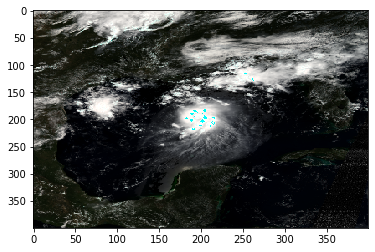

In [111]:
file ='/home/fun/data/AL022004/10_modis_satellite_20040811.npy'

rgb = np.load(file)


R_LH = rgb[0, :, :]
print (rgb.shape)

plt.imshow(rgb, interpolation='nearest', aspect='auto')
#plt.imshow(T20)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


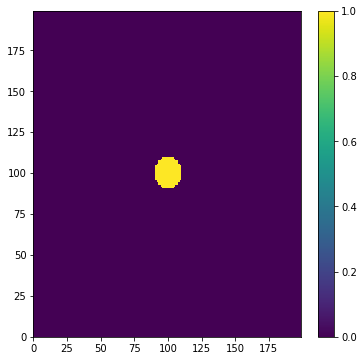

In [109]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 200)
y = np.arange(0, 200)
arr = np.zeros((y.size, x.size))


def get_circluar_mask(arr, cx, cy, r1, r2):
    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r1**2
    mask2 = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r2**2
    arr[mask2] = 1.
    arr[mask] = 0.



get_circluar_mask(arr, 100, 100, 0, 10)


# This plot shows that only within the circle the value is set to 123.
plt.figure(figsize=(6, 6))
plt.pcolormesh(x, y, arr)
plt.colorbar()
plt.show()